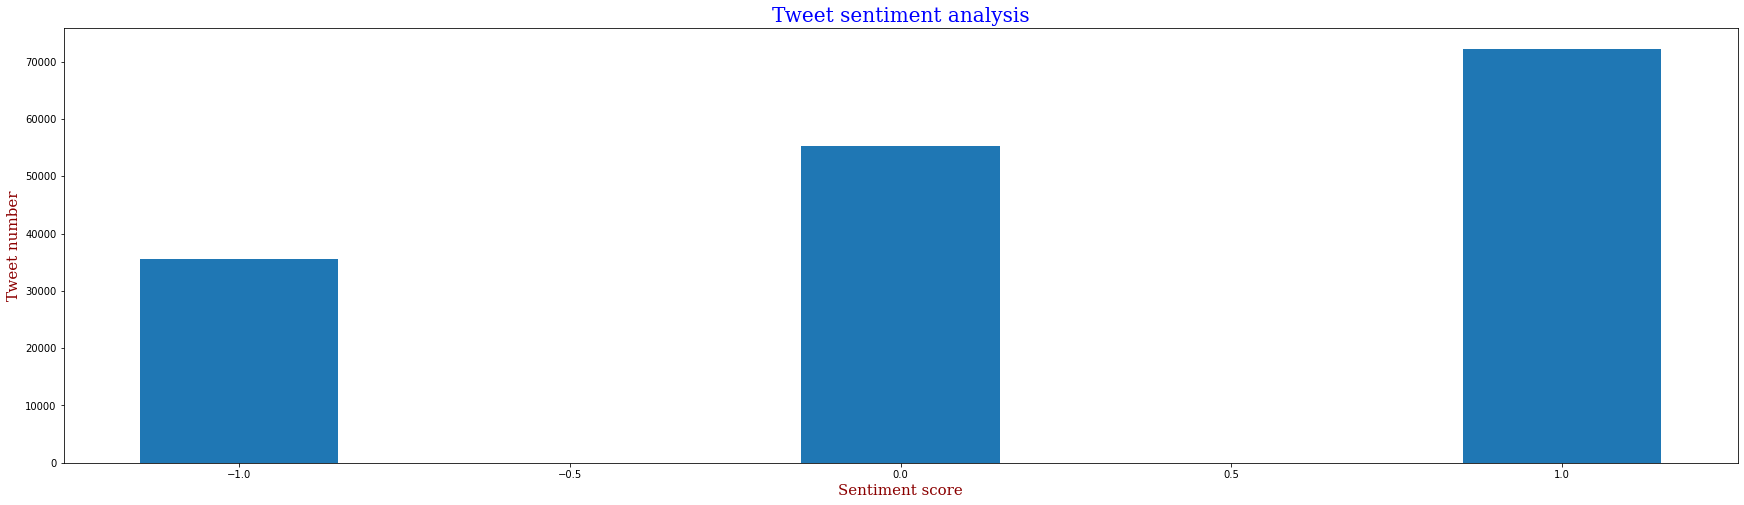

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from textwrap import wrap

data = pd.read_csv('Twitter_Data.csv', encoding='latin_1')

scores = [-1, 0, 1]
tweetsNeg = (data[data.category==-1.0]["clean_text"]).array
tweetsNeutral = (data[data.category==0]["clean_text"]).array
tweetsPos = (data[data.category==1.0]["clean_text"]).array

tweets = [len(tweetsNeg), len(tweetsNeutral), len(tweetsPos)]

font_title = {'family':'serif','color':'blue','size':20}
font_axis = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(30,8))
plt.bar(scores, tweets, width = 0.3)
plt.title("Tweet sentiment analysis", fontdict=font_title)
plt.xlabel("Sentiment score", fontdict=font_axis)
plt.ylabel("Tweet number", fontdict=font_axis)
plt.show()

In [3]:
trump_dataset = pd.read_csv('hashtag_donaldtrump.csv', encoding='latin_1', lineterminator='\n')
biden_dataset = pd.read_csv('hashtag_joebiden.csv', encoding='latin_1', lineterminator='\n')

trump_dataset.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - Ø±ÙØ§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


# Clean the data

In [4]:
trump_dataset['reference'] = 'trump'
biden_dataset['reference'] = 'biden'

dataset = pd.concat([trump_dataset, biden_dataset])

dataset = dataset.drop(columns = ['collected_at', 'tweet_id', 'source', 'user_name', 'user_screen_name', 'user_description', 'user_join_date'])

dataset.sort_values(by='created_at')

dataset.head()

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,reference
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,3.606665e+08,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,3.316176e+08,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,8.283556e+17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,4.741380e+07,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,trump


In [5]:
dataset.count()

created_at              1747805
tweet                   1747805
likes                   1747805
retweet_count           1747805
user_id                 1747805
user_followers_count    1747805
user_location           1219061
lat                      801012
long                     801012
city                     414059
country                  796527
continent                796562
state                    580815
state_code               545034
reference               1747805
dtype: int64

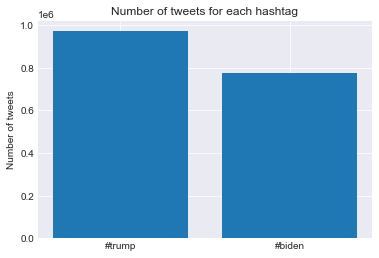

In [21]:
plt.style.use('seaborn-darkgrid')

x = ['#trump', '#biden']
nb_tweets_each_hashtag = [(dataset['reference'] == 'trump').sum(), (dataset['reference'] == 'biden').sum()]

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, nb_tweets_each_hashtag, align='center')
plt.ylabel("Number of tweets")
plt.title("Number of tweets for each hashtag")

plt.xticks(x_pos, x)

plt.show()

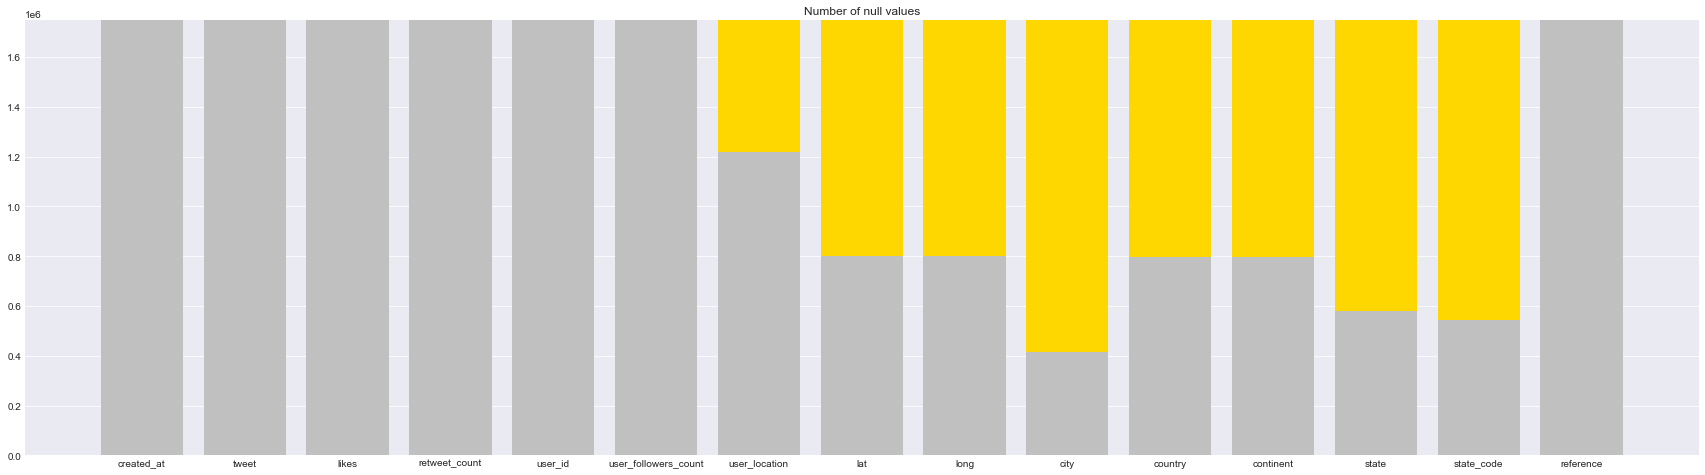

In [27]:
x = ['created_at', 'tweet', 'likes', 'retweet_count', 'user_id', 'user_followers_count', 'user_location', 'lat', 'long', 'city', 'country', 'continent', 'state', 'state_code', 'reference']

nb_tweets = len(dataset)
non_null_values = dataset.count().tolist()
null_values = [nb_tweets - value for value in non_null_values]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(30,8))
plt.bar(x_pos, null_values, width=0.8, label='Null values', color='gold', bottom=non_null_values)
plt.bar(x_pos, non_null_values, width=0.8, label='Non null values', color='silver')

plt.xticks(x_pos, x)
plt.title("Number of null values")

plt.show()